# Using Matplotlib

In [1]:
# required imports
#https://medium.com/analytics-vidhya/generate-a-static-choropleth-india-map-using-corona-virus-pandemic-data-19e9cbf5a07d

import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gdp  # conda
import geoplot as gplt # pip
import geoplot.crs as gcrs


sns.set_style('whitegrid')

In [2]:
#Reading the shape file
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)

map_df.head()

from datetime import date
output_file =  str(date.today())

In [3]:
data = pd.read_csv("All_States_Daily_Count.csv",index_col=0)
data.iloc[-1:, -4:] = data.iloc[1:-1,-4:].astype(int).sum().to_list()

In [4]:
total_cases = pd.DataFrame()
total_cured = pd.DataFrame()
total_deaths = pd.DataFrame()

In [5]:
i=1
for col in data.columns:
    if i%4==1:total_cases[col]=data[col]
    if i%4==3:total_cured[col]=data[col]
    if i%4==0:total_deaths[col]=data[col]
    i+=1

In [6]:
total_cases.drop(index=[np.NaN], axis=0, inplace=True)
total_cured.drop(index=[np.NaN], axis=0, inplace=True)
total_deaths.drop(index=[np.NaN], axis=0, inplace=True)
total_cases = total_cases.astype(int)
total_cured = total_cured.astype(int)
total_deaths = total_deaths.astype(int)

C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


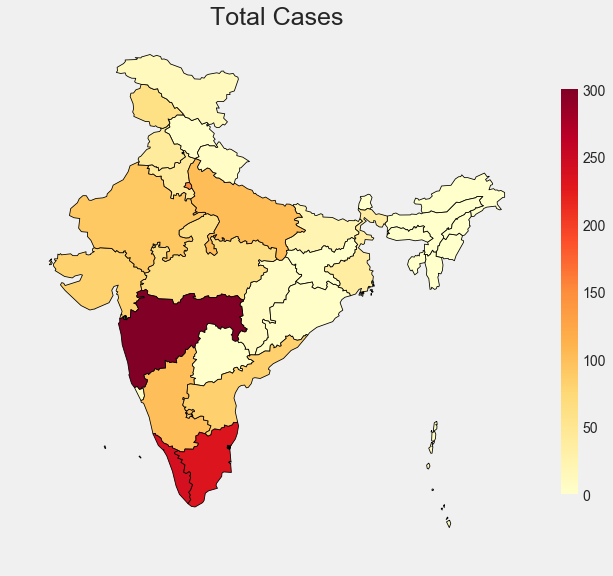

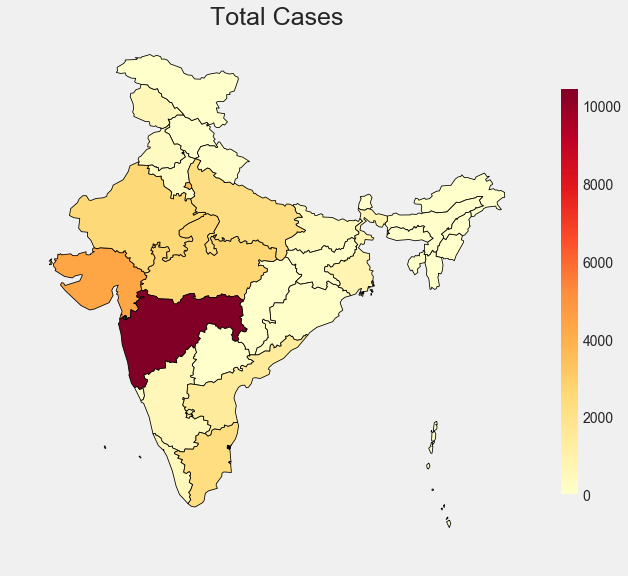

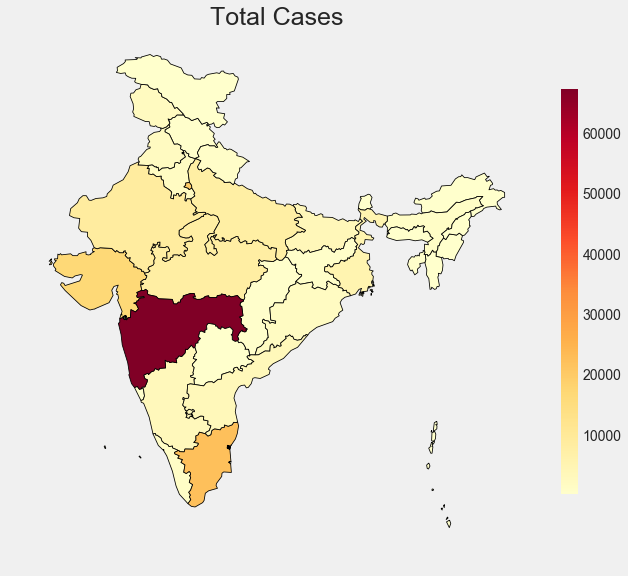

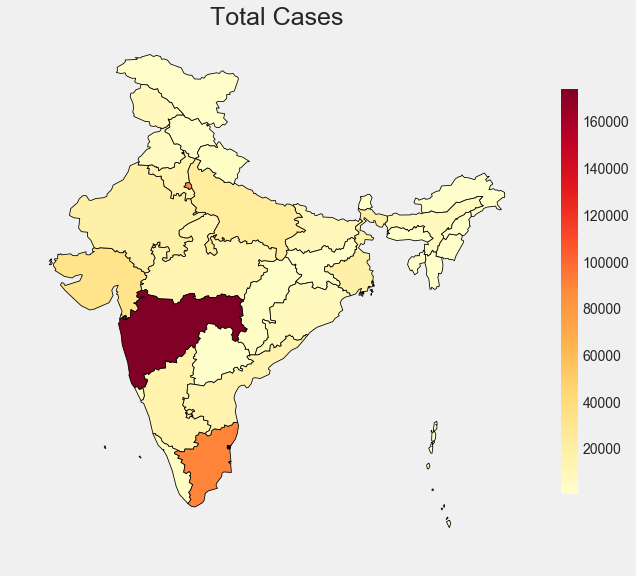

In [31]:
# Generates Total Cases Map
dfm = total_cases.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_cases'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/total_cases/' + i + '.png'
        # plot the figure
        merged.plot(column='total_cases',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.7},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


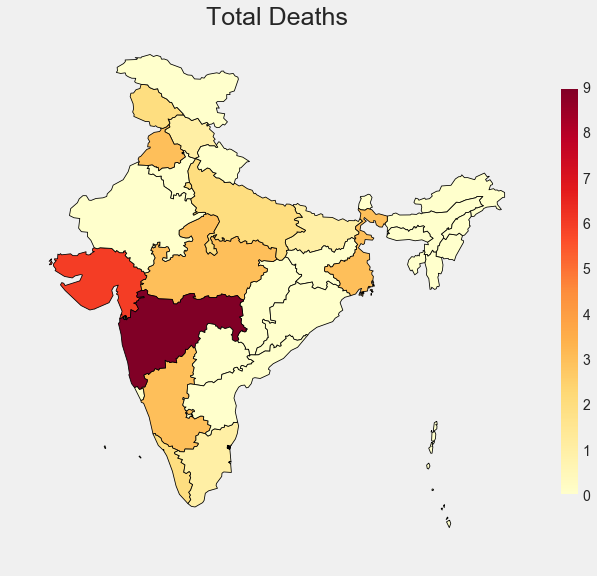

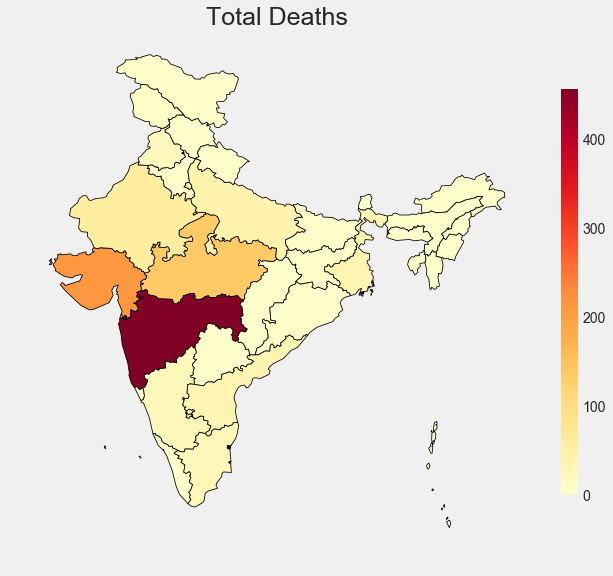

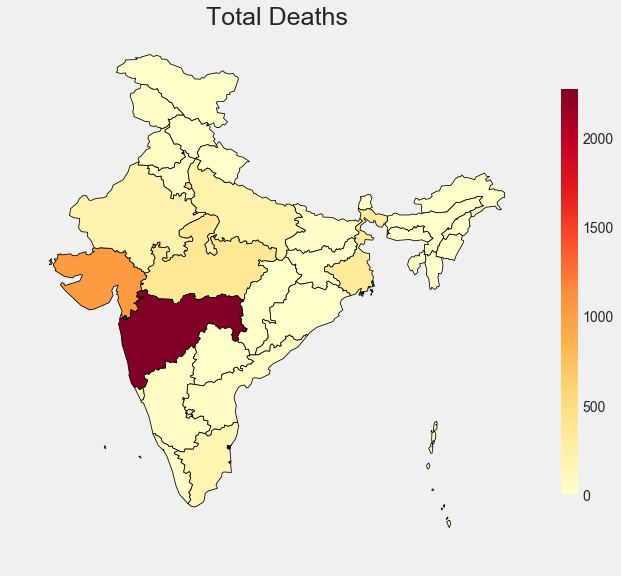

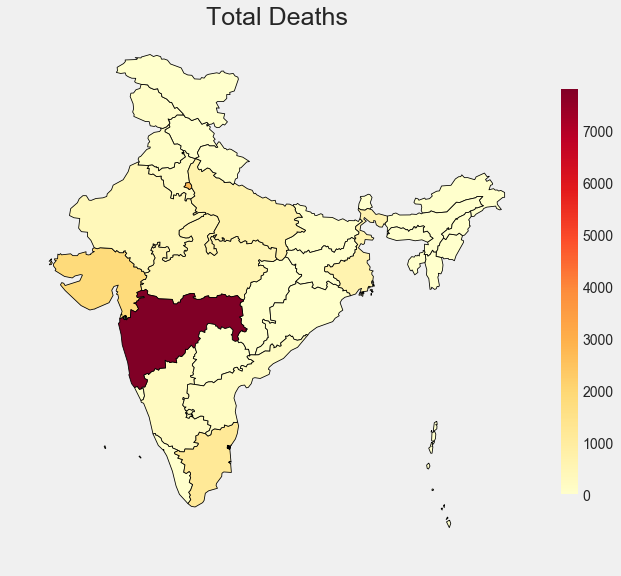

In [32]:
# Generates Total Deaths Map
dfm = total_deaths.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_deaths'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/deaths/' + i + '.png'
        # plot the figure
        merged.plot(column='total_deaths',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.7},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


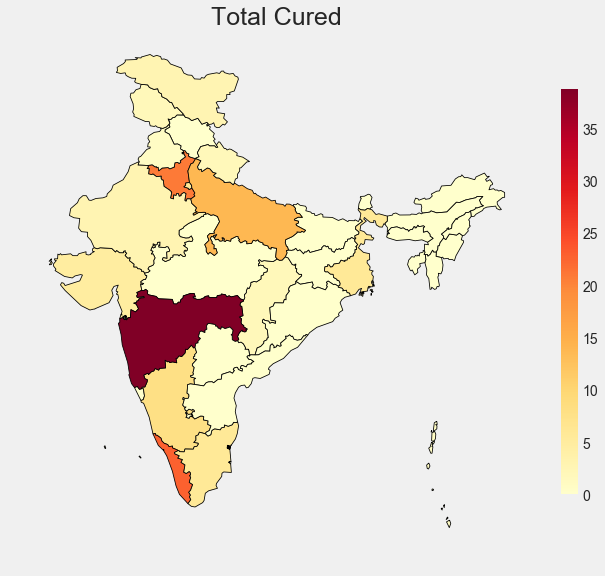

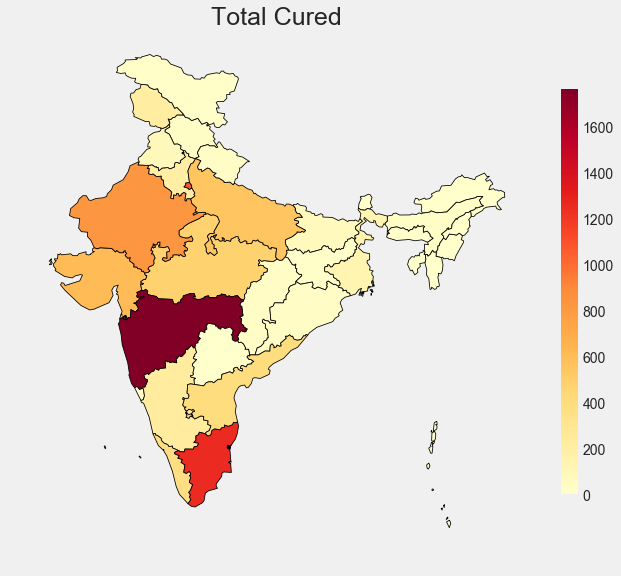

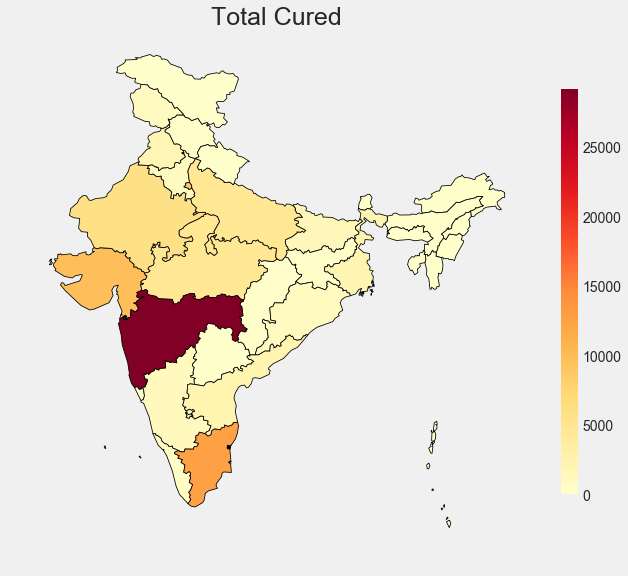

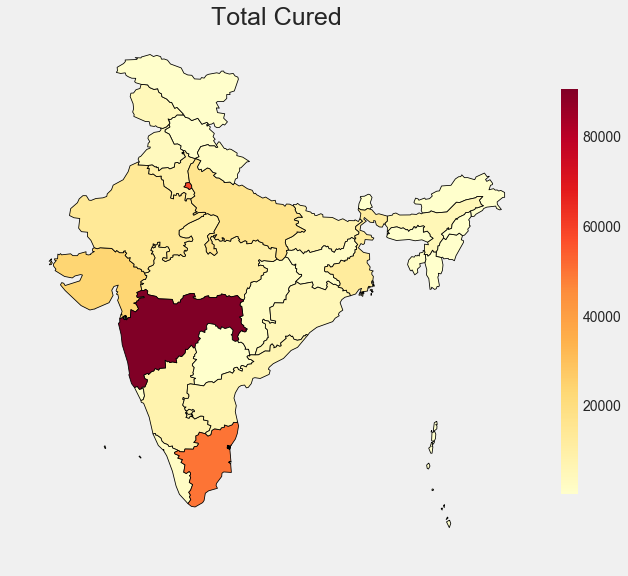

In [33]:
# Generates Total Cured Map 
dfm = total_cured.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_cured'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Cured', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/cured_cases/' + i + '.png'
        # plot the figure
        merged.plot(column='total_cured',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.7},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

In [21]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 7, 12)
time_axis = []
for dt in daterange(start_dt, end_dt):
    time_axis.append(dt)

In [22]:
cases = total_cases.copy().transpose()
date= pd.to_datetime(time_axis)
cases['date'] = date


In [24]:
other_states = [col for col in cases.columns if col not in ["Delhi", "Maharashtra", "Tamil Nadu", "Totals"]]


In [25]:
cases["Rest of India"] = cases[other_states].sum(axis=1)

In [26]:
plot_cases = cases[["Delhi", "Maharashtra", "Tamil Nadu", "Rest of India"]]


In [27]:
date = pd.DataFrame(date)
date.iloc[:,0].dt.is_month_start
plt.rcParams['figure.figsize'] = 12, 6
plt.style.use("fivethirtyeight")

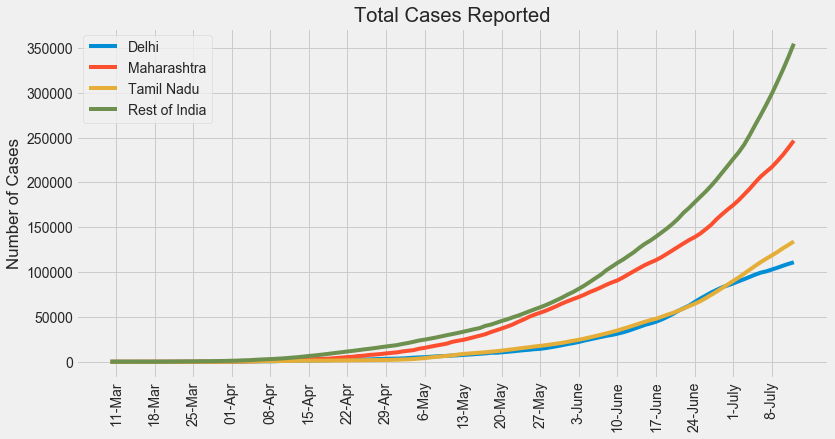

In [29]:
fig = plt.plot(plot_cases.index,plot_cases)
plt.title("Total Cases Reported")
plt.legend(labels=["Delhi", "Maharashtra", "Tamil Nadu", "Rest of India"])
plt.xticks(ticks=range(1,date.shape[0],7), rotation=90)
plt.ylabel("Number of Cases")
plt.savefig('Images/comparison.png', dpi=300, bbox_inches='tight')
plt.show()